# Analysing the Results from my Backtest on my training data

In [1]:
import pyfolio as pf
import pandas as pd
import matplotlib.pyplot as plt

My benchmark is going to be equivalent of having half my portfolio in BTC and the other half in ETH.

In [13]:
btc, eth = pd.read_csv('data/Bitcoin.csv', index_col='Date'), pd.read_csv('data/Ethereum.csv', index_col='Date')
btc.index, eth.index = pd.to_datetime(btc.index, utc=True), pd.to_datetime(eth.index, utc=True)
benchmark = 0.5*btc['2020-11-01':'2021-02-07'].Close.pct_change() + 0.5*eth['2020-11-01':'2021-02-07'].Close.pct_change()
benchmark.name = 'Benchmark'

Text(0.5, 1.0, 'Benchmark Portfolio Cumalative Returns')

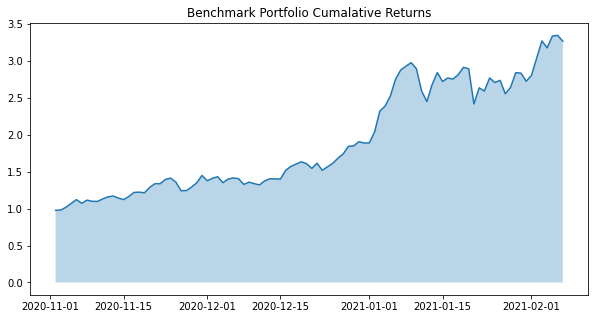

In [14]:
plt.figure(figsize=(10,5))
plt.plot((1+benchmark).cumprod())
plt.fill_between(benchmark.index,0,(1+benchmark).cumprod(), alpha=0.3)
plt.title("Benchmark Portfolio Cumalative Returns")

In [15]:
returns = pd.read_pickle("results/testing/returns.pickle")
positions = pd.read_pickle("results/testing/positions.pickle")
transactions = pd.read_pickle("results/testing/transactions.pickle")

Start date,2020-11-01
End date,2021-02-07
Total months,4
,Backtest
Annual return,22.7%
Cumulative returns,8.4%
Annual volatility,24.7%
Sharpe ratio,0.95
Calmar ratio,2.24
Stability,0.61
Max drawdown,-10.1%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,9.75,2021-01-10,2021-01-30,NaT,NaN
1,7.08,2020-11-05,2020-11-15,2020-12-19,32
2,3.83,2020-12-26,2020-12-27,2021-01-04,6
3,2.64,2021-01-06,2021-01-07,2021-01-10,3
4,0.0,2020-11-03,2020-11-03,2020-11-03,1


Stress Events,mean,min,max
New Normal,0.07%,-4.91%,4.33%


Top 10 long positions of all time,max
Bitcoin,66.53%
Ethereum,60.46%


Top 10 short positions of all time,max
Bitcoin,-59.35%
Ethereum,-57.67%


Top 10 positions of all time,max
Bitcoin,66.53%
Ethereum,60.46%


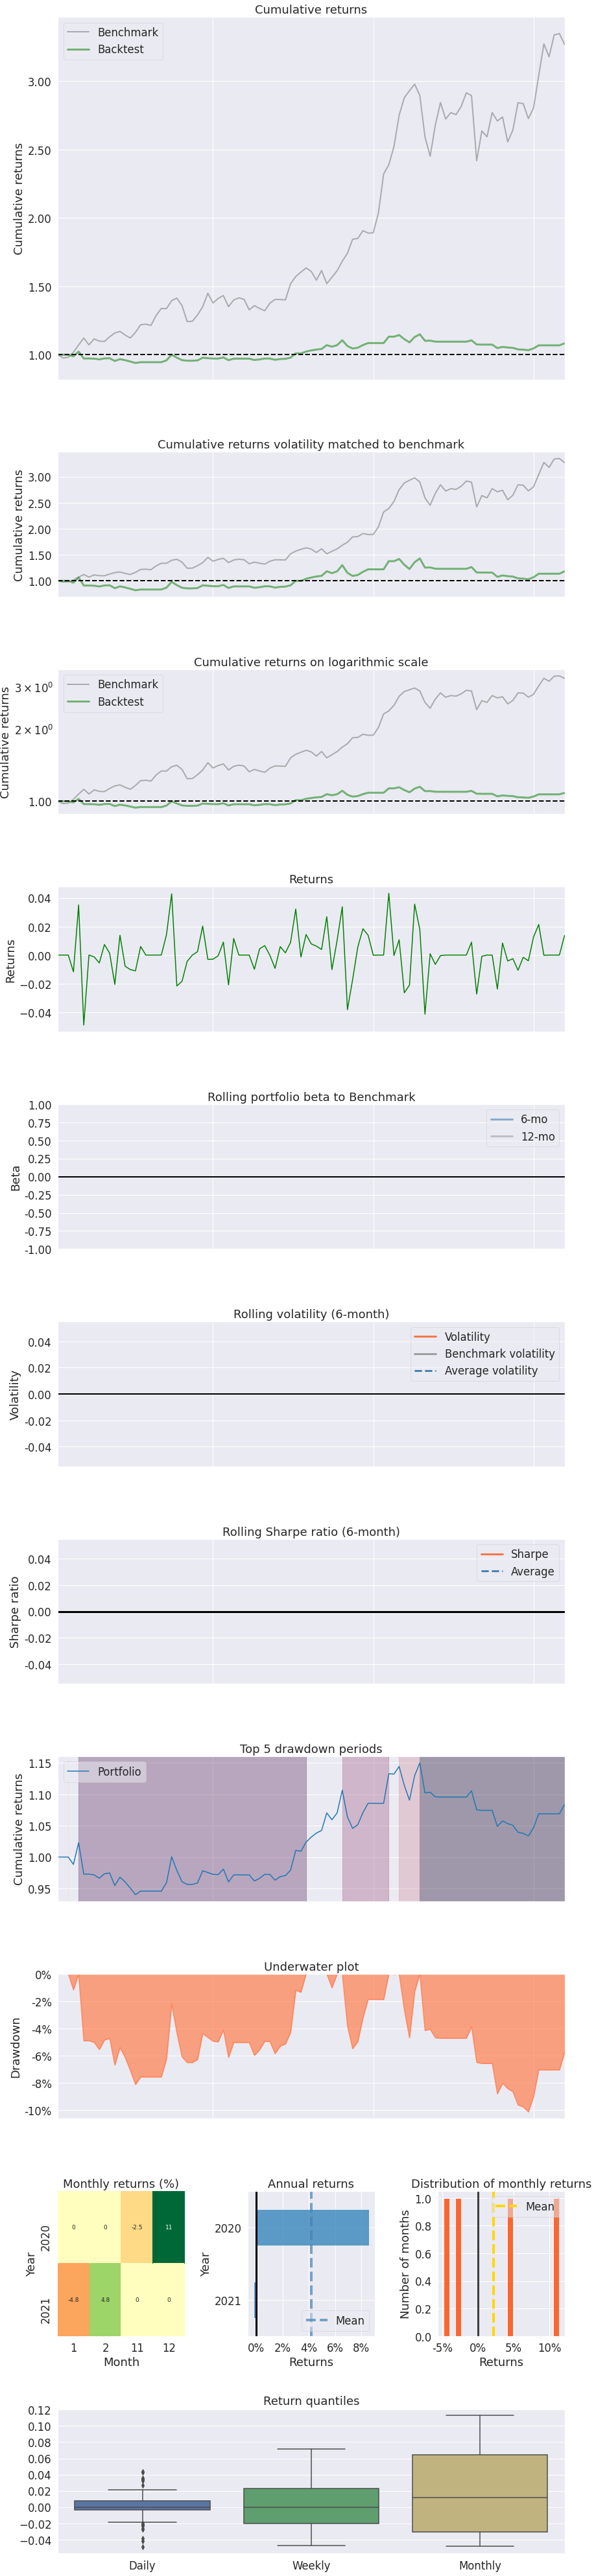

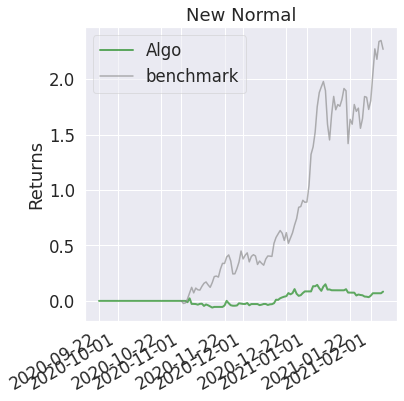

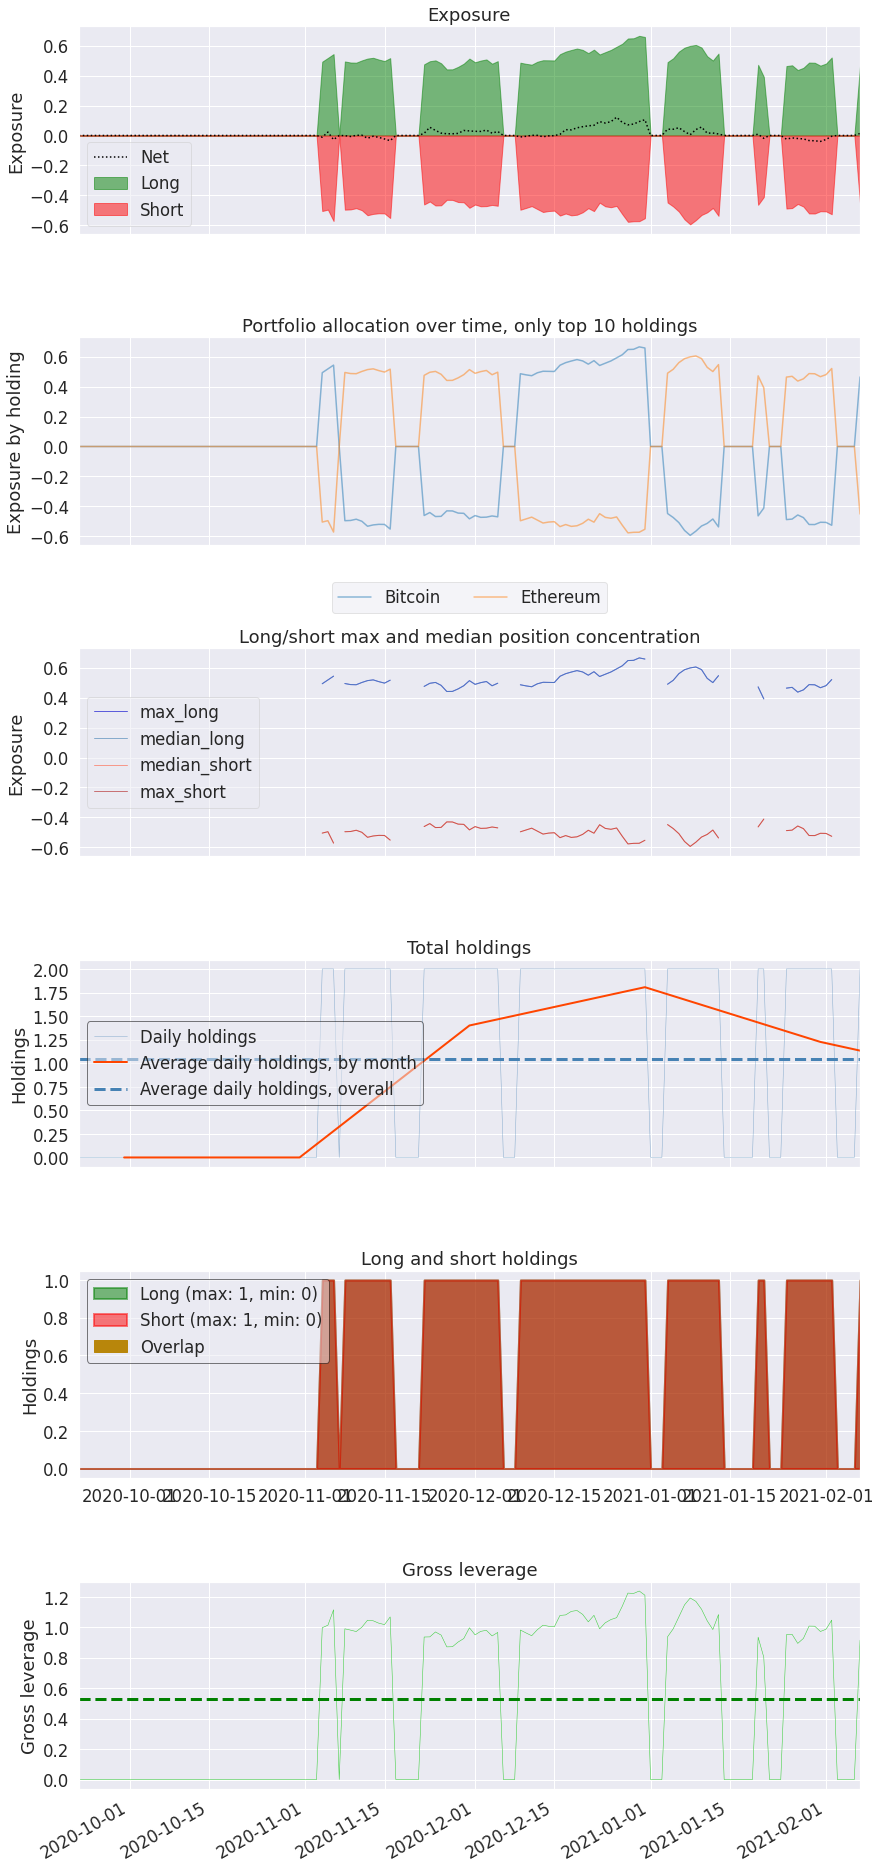

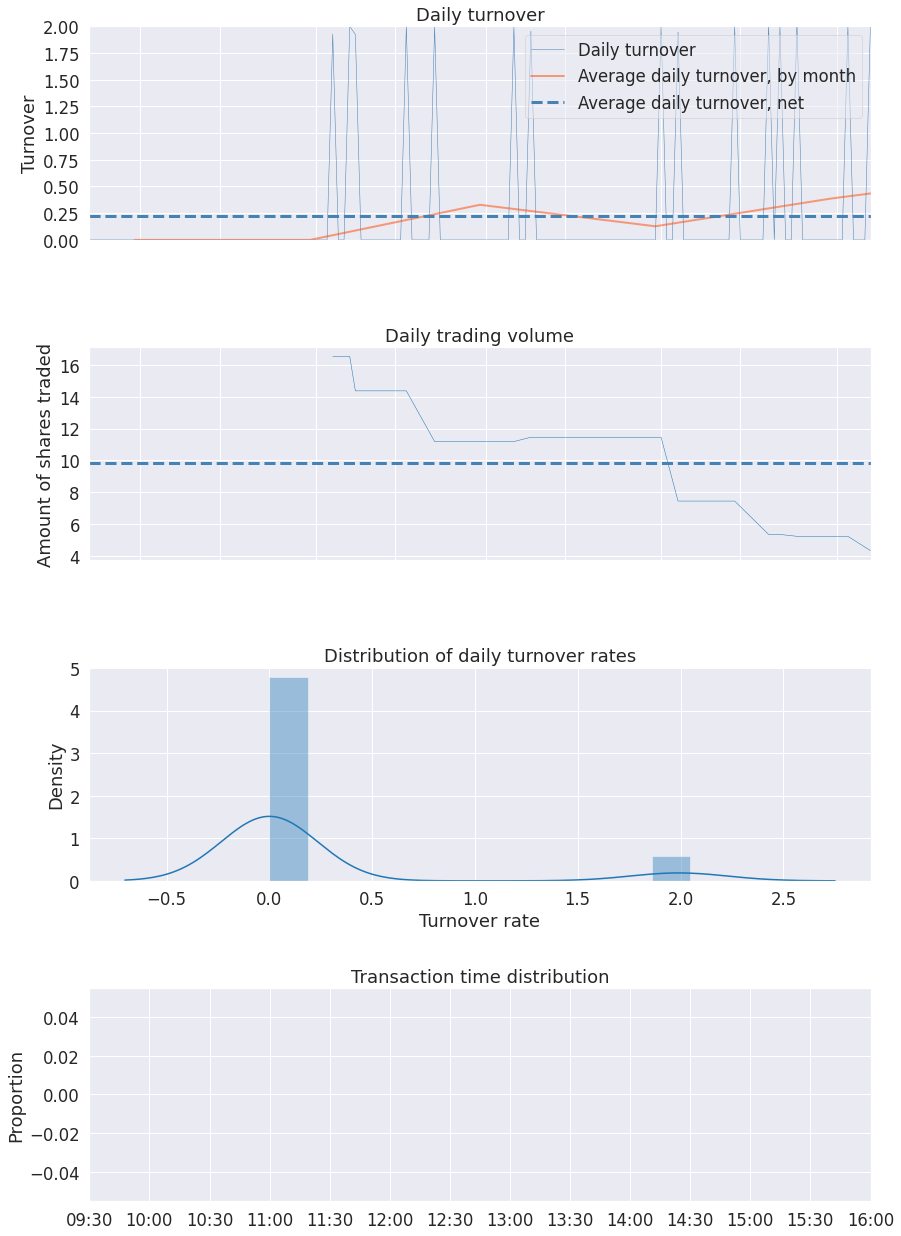

In [16]:
pf.create_full_tear_sheet(
    returns, 
    positions=positions, 
    transactions=transactions, 
    round_trips=False,
    benchmark_rets=benchmark,
)